### Importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing files

In [2]:
new_application = pd.read_csv('application_data.csv')
prev_application = pd.read_csv('previous_application.csv')

### Data Understanding

In [3]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
new_application.shape

(307511, 122)

In [5]:
new_application.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [6]:
#checking previous application dataset
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

### Analysis for new Application Dataset

In [7]:
new_application.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### To Display all Rows and Columns

In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### checking for the null values in new_applicaton dataset

In [9]:
(new_application.isnull().sum()).sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

### Checking the percentage of null values in the dataset

In [10]:
newApp_nullpercent = (new_application.isnull().sum()*100/len(new_application)).sort_values(ascending=False)

In [11]:
#checking the columns having more than 40% of null values
to_drop = newApp_nullpercent[newApp_nullpercent>40]
to_drop

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [12]:
#droping the columns having more than 40% of nulll values
new_application.drop(labels=list(to_drop.index),axis=1,inplace=True)

In [13]:
new_application.shape

(307511, 73)

In [14]:
null_count = (new_application.isnull().sum()*100/len(new_application)).sort_values(ascending=False)

#### Analyzing missing values for the columns having less than 30%of null values and checking for outliers if any and imputing some of them

In [15]:
null_count[(null_count>0) & (null_count<30)]

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

In [16]:
###

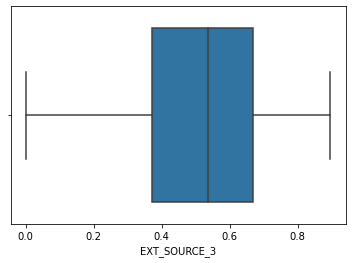

In [17]:
#since EXT_SOURCE_3 is an continuous numeric column we can check for outliers using box plot.
sns.boxplot(new_application['EXT_SOURCE_3'])
plt.show()

In [18]:
#since there is no outliers present so null values can be imputed with average/mean of the column
print("mean of EXT_SOURCE_3 is :",new_application['EXT_SOURCE_3'].mean())

mean of EXT_SOURCE_3 is : 0.5108529061800121


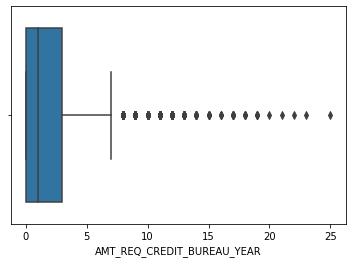

In [19]:
#'AMT_REQ_CREDIT_BUREAU_YEAR'is an numeric column will check for outliers using boxplot
sns.boxplot(new_application['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [20]:
print('The median  is :',new_application['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

The median  is : 1.0


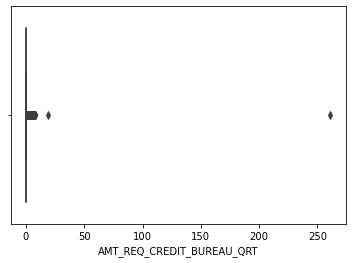

In [21]:
##'AMT_REQ_CREDIT_BUREAU_QRT' is an numeric column will check for outliers using boxplot
sns.boxplot(new_application['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [22]:
#As there are outliers present we will use median to impute mising values.
new_application['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=new_application['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)

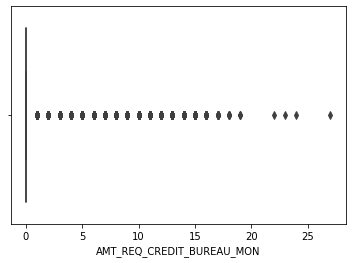

In [23]:
#'AMT_REQ_CREDIT_BUREAU_MON' is an is an numeric column will check for outliers using boxplot
sns.boxplot(new_application['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [24]:
#As there are outliers present we will use median to impute mising values.
print('The median is :',new_application['AMT_REQ_CREDIT_BUREAU_MON'].median())

The median is : 0.0


In [25]:
#checking NAME_TYPE_SUITE column
new_application["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [26]:
#since NAME_TYPE_SUITE is catogorical column so we use mode again to fill null values.
print('Mode of NAME_TYPE_SUITE is:',new_application['NAME_TYPE_SUITE'].mode()[0])

Mode of NAME_TYPE_SUITE is: Unaccompanied


In [27]:
#checking OBS_30_CNT_SOCIAL_CIRCLE column
new_application['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [28]:
#As there are outliers present we will use median to impute mising values.
new_application['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=new_application['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [29]:
#checking OBS_60_CNT_SOCIAL_CIRCLE column
new_application['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

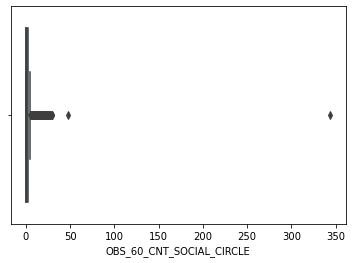

In [30]:
#checking for outliers in OBS_60_CNT_SOCIAL_CIRCLE column using boxplot
sns.boxplot(new_application['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.show()


In [31]:
#using median to fill null values as outliers are present.
new_application['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=new_application['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [32]:
#checking DEF_60_CNT_SOCIAL_CIRCLE column
new_application['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()


0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

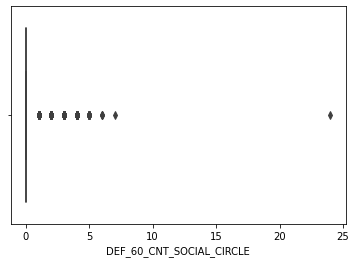

In [33]:
#checking for outliers in DEF_60_CNT_SOCIAL_CIRCLE column using boxplot.
sns.boxplot(new_application['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.show()

In [34]:
#As there are outliers present we will use median to impute mising values.
new_application['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=new_application['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [35]:
#checking EXT_SOURCE_2 column
new_application['EXT_SOURCE_2'].value_counts()

2.858979e-01    721
2.622584e-01    417
2.652563e-01    343
1.596792e-01    322
2.653117e-01    306
2.665198e-01    244
2.631436e-01    243
1.621446e-01    238
1.621921e-01    234
1.631870e-01    184
1.604053e-01    173
1.915259e-01    169
2.453496e-01    167
3.542247e-01    149
1.942664e-01    140
1.923161e-01    131
3.572820e-01    129
1.942151e-01    127
1.953538e-01    123
3.551256e-01    113
3.411229e-01    110
2.556162e-01     92
3.585685e-01     90
2.930897e-01     85
2.620553e-01     84
3.441915e-01     84
3.573422e-01     81
2.547600e-01     80
3.420278e-01     73
2.961436e-01     72
2.007754e-01     71
3.442507e-01     69
1.542654e-01     67
2.290030e-01     67
2.962028e-01     67
3.454859e-01     67
2.746463e-01     66
2.598076e-01     64
2.974306e-01     64
2.629359e-01     61
3.102603e-01     61
1.548483e-01     59
2.533716e-01     59
2.650476e-01     59
2.563408e-01     58
5.806869e-01     57
2.632411e-01     56
6.019534e-01     55
1.535706e-01     55
2.015837e-01     54


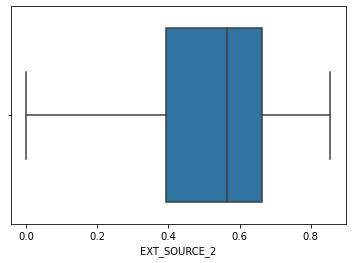

In [36]:
#checking for outliers using boxplot in EXT_SOURCE_2 column. 
sns.boxplot(new_application['EXT_SOURCE_2'])
plt.show()

In [37]:
#since there is no outliers present so null values can be imputed with average/mean of the column.
new_application['EXT_SOURCE_2'].fillna(value=new_application['EXT_SOURCE_2'].mean(),inplace=True)

In [38]:
#checking AMT_GOODS_PRICE column
new_application['AMT_GOODS_PRICE'].value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2501
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

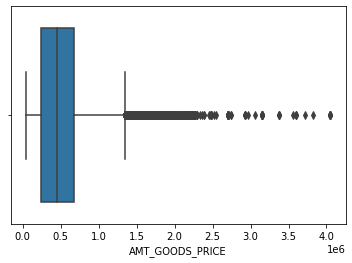

In [39]:
#checking for outliers using boxplot in AMT_GOODS_PRICE column.
sns.boxplot(new_application['AMT_GOODS_PRICE'])
plt.show()

In [40]:
#As there are outliers present we will use median to impute mising values.
new_application['AMT_GOODS_PRICE'].fillna(value=new_application['AMT_GOODS_PRICE'].median(),inplace=True)

In [41]:
#checking AMT_ANNUITY column
new_application['AMT_ANNUITY'].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
11250.0     1459
26217.0     1453
20250.0     1345
12375.0     1339
31653.0     1269
26640.0     1236
22500.0     1234
16875.0     1213
36459.0     1191
33025.5      938
26446.5      916
22018.5      904
23773.5      875
25537.5      836
26316.0      829
31261.5      822
21906.0      800
7875.0       741
40320.0      703
21888.0      688
32602.5      687
15750.0      684
27000.0      681
19867.5      653
33750.0      652
21775.5      643
29970.0      643
30528.0      626
45000.0      570
14350.5      564
32895.0      564
14751.0      551
23494.5      540
42790.5      527
26086.5      507
29250.0      506
23931.0      501
31630.5      499
31522.5      495
24939.0      491
16456.5      490
19125.0      471
21109.5      466
13963.5      462
30078.0      450
28408.5      449
45333.0      441
46084.5      436
67500.0      431
16011.0      419
35937.0      418
24543.0      418
25321.5      417
24246.0      4

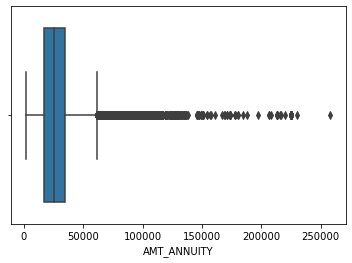

In [42]:
#checking for outliers using boxplot in AMT_ANNUITY column.
sns.boxplot(new_application['AMT_ANNUITY'])
plt.show()

In [43]:
#As there are outliers present we will use median to impute mising values.
new_application['AMT_ANNUITY'].fillna(value=new_application['AMT_ANNUITY'].median(),inplace=True)

In [44]:
#checking CNT_FAM_MEMBERS columns
new_application['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

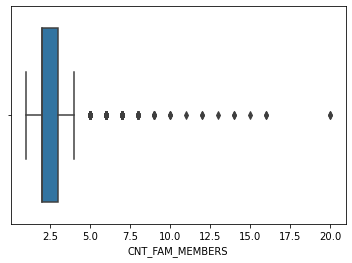

In [45]:
#checking for outliers using boxplot in CNT_FAM_MEMBERS column.
sns.boxplot(new_application['CNT_FAM_MEMBERS'])
plt.show()

In [46]:
#As there are outliers present we will use median to impute mising values.
new_application['CNT_FAM_MEMBERS'].fillna(value=new_application['CNT_FAM_MEMBERS'].median(),inplace=True)

In [47]:
# checking DAYS_LAST_PHONE_CHANGE 
new_application['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-358.0       203
-329.0       203
-293.0       202
-350.0       201
-441.0       200
-399.0       200
-404.0       199
-9.0         198
-463.0       198
-11.0        198
-301.0       197
-362.0       195
-304.0       195
-496.0       195
-308.0       195
-483.0       195
-500.0       194
-355.0       194
-427.0       193
-391.0       193
-334.0       193
-448.0       192
-347.0       192
-413.0       191
-415.0       191
-447.0       190
-469.0       190
-546.0       190
-499.0       189
-353.0       188
-566.0       188
-428.0       187
-420.0       187
-417.0       186
-315.0       186
-475.0       186
-574.0       186
-454.0       185
-511.0       185
-484.0       185
-296.0       185
-534.0       185
-509.0       184
-609.0       183
-291.0       1

In [48]:
#again checking for null values in new_application data
(new_application.isnull().sum()*100/len(new_application)).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_3                 0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
FLAG_DOCUMENT_2                 0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
FLAG_DOCUMENT_8                 0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
EXT_SOURCE_2                    0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
LIVE_CITY_NOT_WO

### we can see there is null values still present in occupation type column, in which we did not impute values with mean,median or mode as it may lead to wrong analysis( As the null percent is high unlike others in which we imputed above).we can leave null values for now and dealt with it after proper analysis on the column.

#### Dropping unwanted columns for our analysis from new_application dataset

In [49]:
new_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

##### Droping flag documents columns and other columns as this are not at all required for analysis purpose thus making data less cumbersome.

In [50]:
#columns not required for analysis.
ntreqd_cols= ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
              'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
              'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
              'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
              'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [51]:
#dropping ntreqd_cols from the datset
new_application.drop(labels=ntreqd_cols,axis=1,inplace=True)

In [52]:
new_application.shape

(307511, 47)

In [53]:
#analysisng CODE_GENDER column 
new_application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [54]:
#As there is an'XNA' data which is sort of missing value so we will impute it with the mode of the respective column.

new_application['CODE_GENDER'].replace('XNA',new_application['CODE_GENDER'].mode()[0],inplace=True)

In [55]:
new_application['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [56]:
#After checking we cansee ther is"XNA" values in ORGANIZATION_TYPE
new_application['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [57]:
#calculating percentage of "XNA" values 
new_application['ORGANIZATION_TYPE'].value_counts()*100/len(new_application)

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

In [58]:
#we will drop XNA values as it is 18% of the dataset.
new_application = new_application[new_application['ORGANIZATION_TYPE']!='XNA']

In [59]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -2120        Laborers              1.0                     2   
1             -291      Core staff              2.0                     1   
2            -2531        Laborers              1.0                     2   
3            -2437        Laborers              2.0                     2   
4            -3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

#### As we can see above that day_birth,days_employed etc contains negative values which is not possible logically so we need to rectify those errors.



In [60]:
#columns with invalid negative values. 
incorrect_cols=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [61]:
#using abs function to convert negative numbers to positive.
new_application[incorrect_cols] = abs(new_application[incorrect_cols])

In [62]:
#As we can see that all the negative values are converted to logical values now.
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0               

### Also we can see that FLAG_OWN_CAR and FLAG_OWN_REALTY columns contain Y/N as responses, so we will convert it to 1,0 as it will be benificial in analysis.

In [63]:
new_application['FLAG_OWN_CAR'] = np.where(new_application['FLAG_OWN_CAR']=='Y',1,0)


In [64]:
new_application['FLAG_OWN_REALTY'] =  np.where(new_application['FLAG_OWN_REALTY']=='Y',1,0)

In [65]:
#As we can se that it has been converted succesfully.
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0   

## Checking the individual column data type and casting it to neccesary data type if required.

In [66]:
#checking the float type columns so that requried changes can be made.
new_application.select_dtypes(include='float64').columns


Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [67]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0   

In [68]:
#now we will convert required data type columns to 'string' or 'category' data types.
To_cat_cols=list(new_application.select_dtypes(include='object').columns)


In [69]:
To_cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [70]:
#after analysis the columns it is better to convert all the columns to category data types.
for i in To_cat_cols:
    new_application[i]=new_application[i].astype('category')

In [71]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0   

In [72]:
#placing income from AMT_INCOME_TOTAL column into differents bins and labeling them as high,medium,etc
new_application['Type_of_Income'] = pd.qcut(new_application['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.5,0.8,1],labels=["Very Low",'Low','Medium','High','Very High'])

In [73]:
new_application['Type_of_Income'].head()

0         High
1    Very High
2     Very Low
3       Medium
4          Low
Name: Type_of_Income, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [74]:
new_application['Type_of_Credit'] = pd.qcut(new_application['AMT_CREDIT'],q=[0,0.1,0.3,0.5,0.8,1],labels=["Very Low",'Low','Medium','High','Very High'])

In [75]:
new_application['Type_of_Credit'].head()

0       Medium
1    Very High
2     Very Low
3          Low
4       Medium
Name: Type_of_Credit, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

#### As we can see there is an Days_birth column which gives us the age in days which is quite not appropriate so we can create separate column of age and then further bin them as for eg.15-20 etc


In [76]:
#dividing the days by 365 will give us the age in years,here we will use floor division so that the output stays in int form 
new_application['Age(in years)'] = new_application['DAYS_BIRTH']//365

In [77]:
print(sorted(new_application['Age(in years)'].unique()))

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]


In [78]:
#here we can see age group consits of age from 20 to 69 years so we can now bin them easily.
new_application['AgeCategories'] = pd.cut(new_application['Age(in years)'],bins=[20,30,40,50,60,100],labels=["20-30","30-40","40-50","50-60","60+"]) 

In [79]:
new_application['AgeCategories'].head()

0    20-30
1    40-50
2    50-60
3    50-60
4    50-60
Name: AgeCategories, dtype: category
Categories (5, object): ['20-30' < '30-40' < '40-50' < '50-60' < '60+']

#### Now we can check the target column which will play a vital role in our analysis 

In [80]:
new_application['TARGET'].value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

#### As mention we need to find data imbalance in this column. To do so we can use pieplot between  client with payment difficulties(1) and  all other cases(0) to visualise the issue

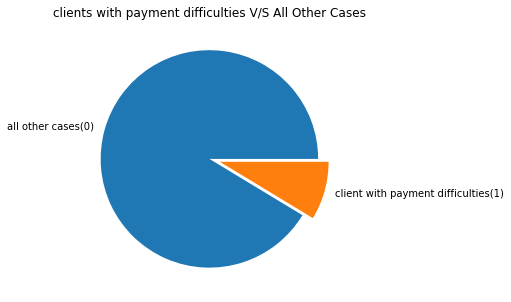

In [81]:
#Having only two variables in the column we can use pichart to visualise difference between them
plt.figure(figsize=[10,5])
plt.pie(new_application["TARGET"].value_counts(normalize=True),explode=(0,0.1),labels=["all other cases(0)","client with payment difficulties(1)"])
plt.title('clients with payment difficulties V/S All Other Cases')
plt.show()

#### There is clear imbalance in the dataset where all other cases(0) is far more supperior to those of client with payment difficulties(1)

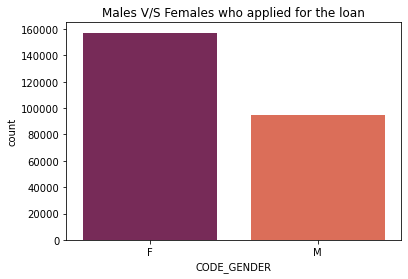

In [82]:
sns.countplot(new_application['CODE_GENDER'],palette ='rocket')
plt.title("Males V/S Females who applied for the loan")
plt.show()

#### Here we can see that count of females applying for loan is high as compare to males which can be both defaulter or non-defaulter

#### so to overcome above issue we can distribute the data into two sets i.e. One for the client with payment difficulties(1) and other one for all other cases(0)

In [83]:
clients_with_difficulty = new_application[new_application['TARGET']==1] 

In [84]:
all_other = new_application[new_application['TARGET']==0] 

# Univariate Analysis 

#### Definning a function so as to ease the process of ploting and visualisation.

In [85]:
def plots(var1,var2,d1,d2):
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Clients With Difficulty")
    plt.xticks(rotation=90,fontsize=12)
    sns.countplot(x=var1,hue=var2 ,data=d1, palette = 'rocket')
    plt.subplot(1,2,2)
    plt.xticks(rotation=90,fontsize=12)
    sns.countplot(x=var1,hue=var2,data=d2,palette = 'rocket')
    plt.title("All Other Cases")
    plt.show()

### Now we will see gender distriibution in both the cases that are clients with difficulty and all other cases.

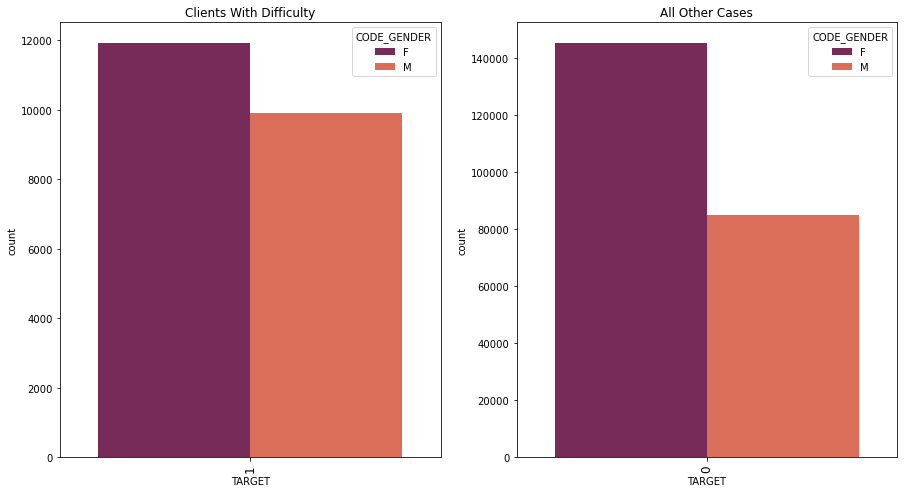

In [86]:
plots('TARGET','CODE_GENDER',clients_with_difficulty,all_other)

### from above we can draw these points:-
#### 1. female clients are greater in numbers for avaling loan from the bank then male clients
#### 2.Even count of female defaulting is high but they are less risky customer than male whose chances of defaulting is high as comapred to females

# now we can check age distribution in different age bins.

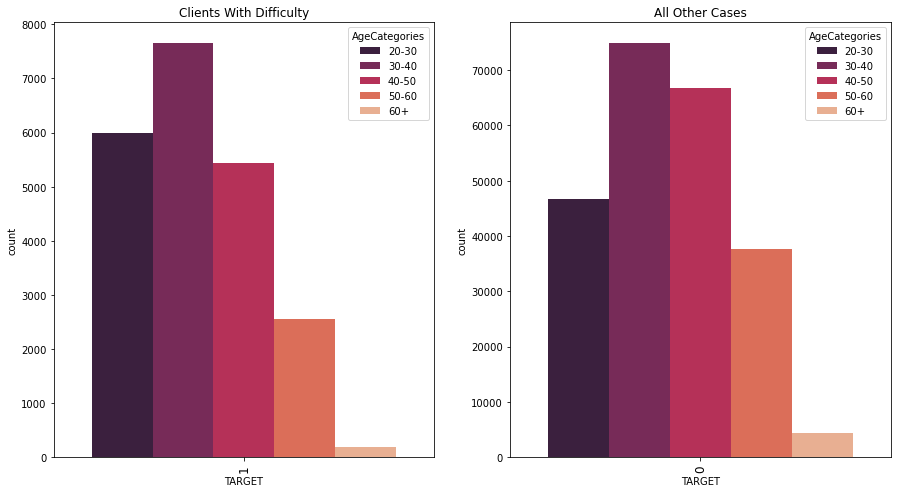

In [87]:
plots('TARGET','AgeCategories',clients_with_difficulty,all_other)


#### age categories of  who are availing more loan  falls under the age group of 30-40 followed by 40-50  in both the cases
#### 20-30 years of age categories are also availing loan and is most likely likely to default hence they are risky age group to disberse the loan
#### 60+ age group or senior cirizen are taking less loan comparitevly but the repaying percentage is highest comparitevly with other age group that is they are creditable customer.
#### clients with difficulty in payments mostly fall under 30-40 followed by 40-50 years of age group
#### age categories of 40-50 is also an profitable option for the bank because there percentage of repaying loan back is higher than their percentage of defaulting the loan.

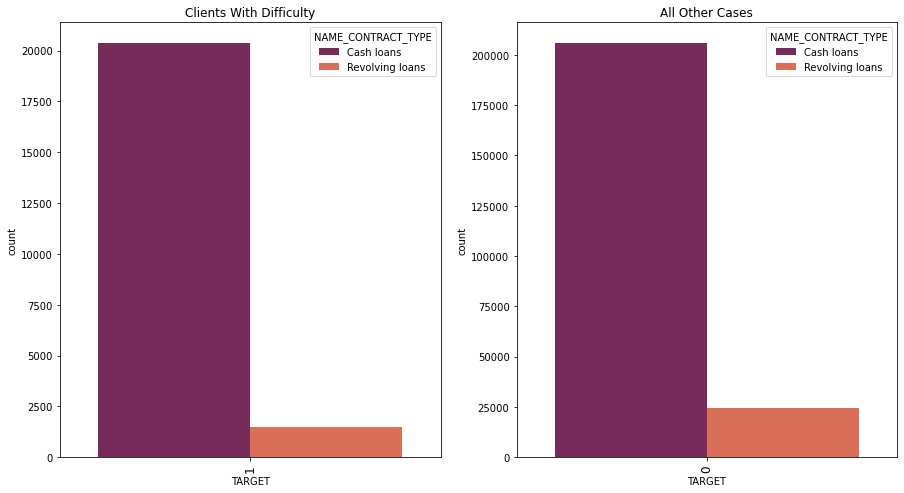

In [88]:
#now we can check which contract type is performing good for the bank.
plots('TARGET','NAME_CONTRACT_TYPE',clients_with_difficulty,all_other)

#### Here it is quite vissible that cash loan is most disbursed loan by the bank in both the cases
#### whereas revolving loans are in very less propotion.
#### also the people availing revolving loans are facing less difficulty in repayments.

In [89]:
new_application['NAME_INCOME_TYPE'].unique()

['Working', 'State servant', 'Commercial associate', 'Student', 'Pensioner', 'Businessman', 'Maternity leave']
Categories (7, object): ['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Working']

#### Analysing NAME_INCOME_TYPE column

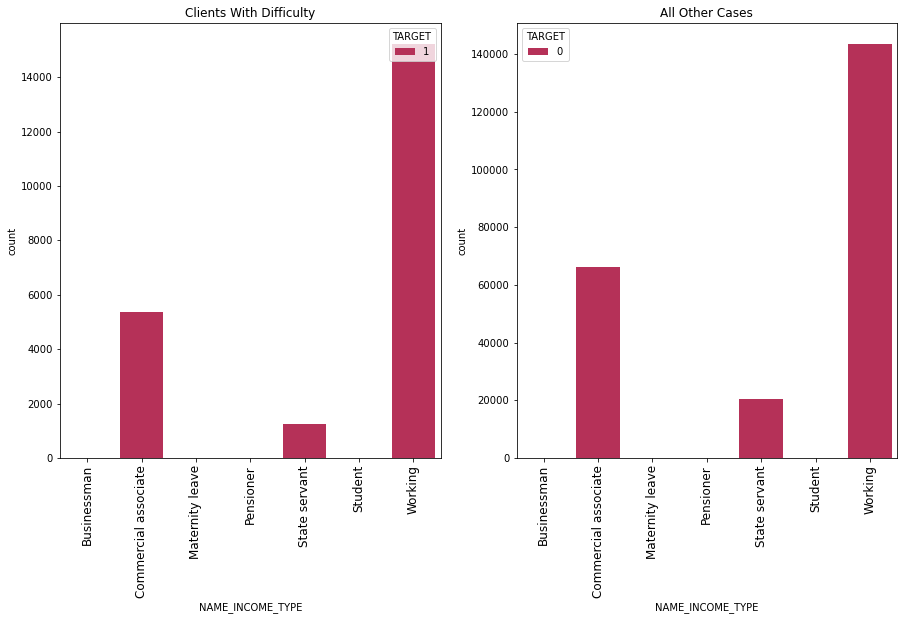

In [90]:
plots('NAME_INCOME_TYPE','TARGET',clients_with_difficulty,all_other)

#### most loan availed are from working class category followed by commercial associates.
#### but working class is also very likely to default the loan thus making them a risky customers for the bank
#### commercial associates has minimum risk to default the loan.
#### state servant avails less loan but is very likely to repay also which means its risk in minimal.

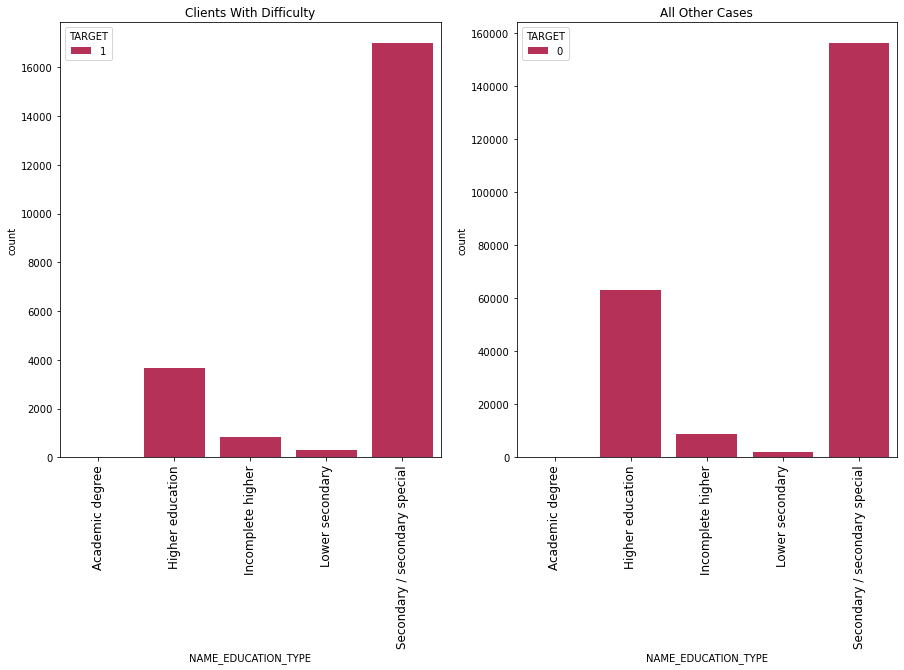

In [91]:
plots('NAME_EDUCATION_TYPE','TARGET',clients_with_difficulty,all_other)

#### secondary/secondary special is the group who avails most loan from the bank but there risk of defaulting is also high
#### minimal risk out of all is for higher education as there repayment probability is quite high thus making a good customer for the bank.

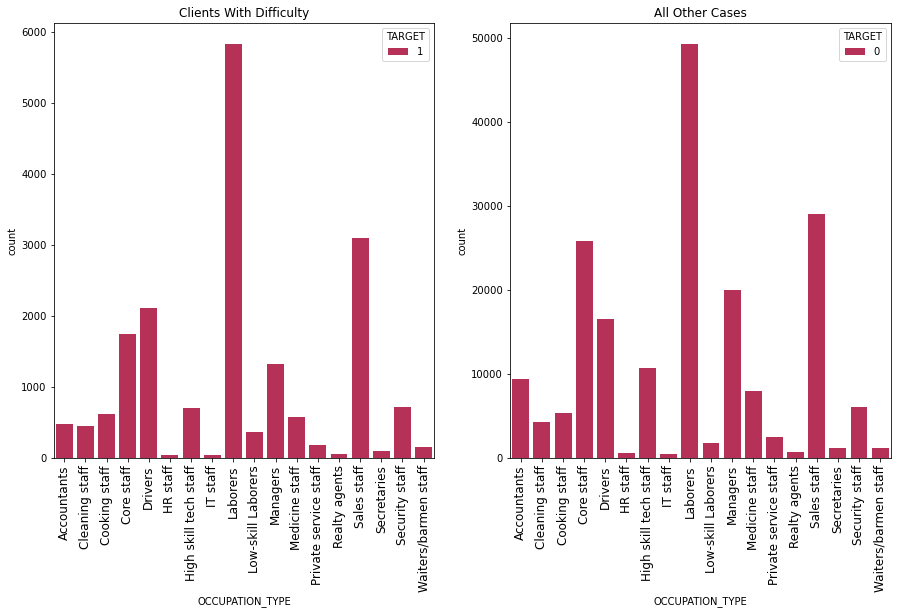

In [92]:
plots('OCCUPATION_TYPE','TARGET',clients_with_difficulty,all_other)

#### most loan are taken by laborers in both the cases followed by sales staff.
#### minimal risk group includes IT staff,Realty agents,Secretaries,HR staff incase of defaluting the loans.
#### Risky customer comes under laborers followed by sales staff in case of defaulting

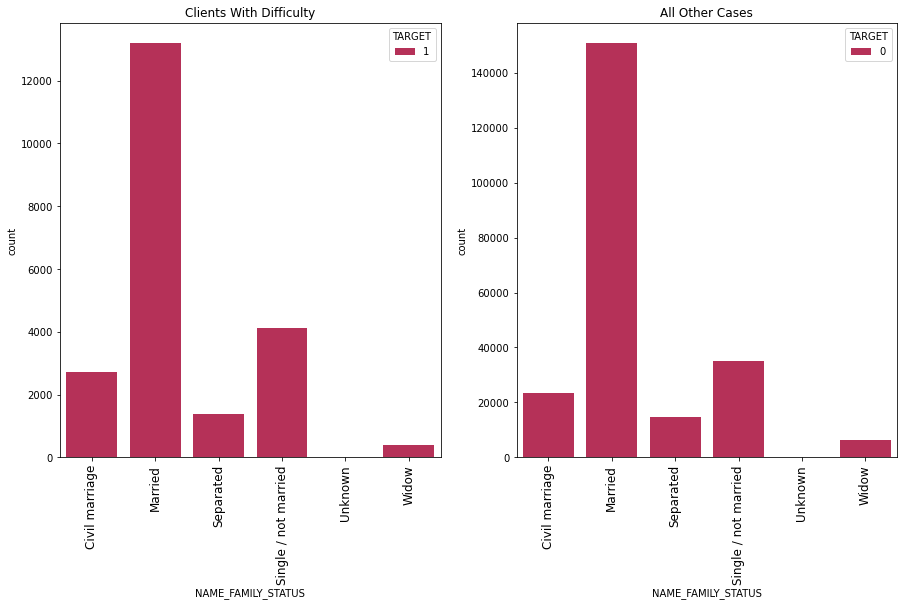

In [93]:
plots('NAME_FAMILY_STATUS','TARGET',clients_with_difficulty,all_other)

#### Most loan are availed by the married peoples which is quite valid point as well,but there chances of defaulting is also very high.
#### single/not married group comes in second place for taking loan but also shows positive sign incase of repayment. Hence making it less risky.
#### Window's group risk is minimal incase of difficulty or defaulting.


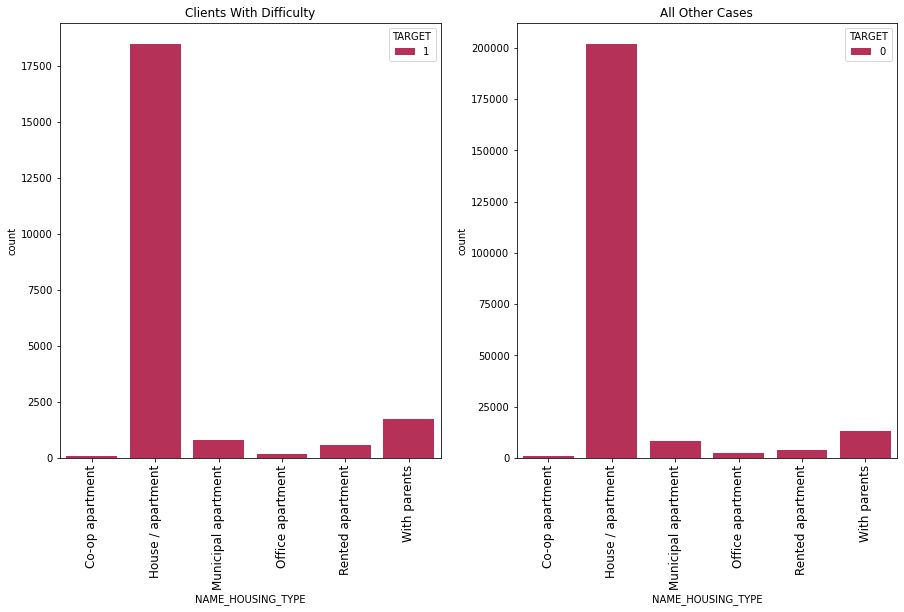

In [94]:
plots('NAME_HOUSING_TYPE','TARGET',clients_with_difficulty,all_other)

#### Most loans are taken by the eople living in house/appartments for both the cases.
#### most risky customer for the bank are the people living with their parents beacuse there chances of defaulting is more than their chances of repayment.
#### Also people living in rented appartments tends to be a risky customers for the bank.

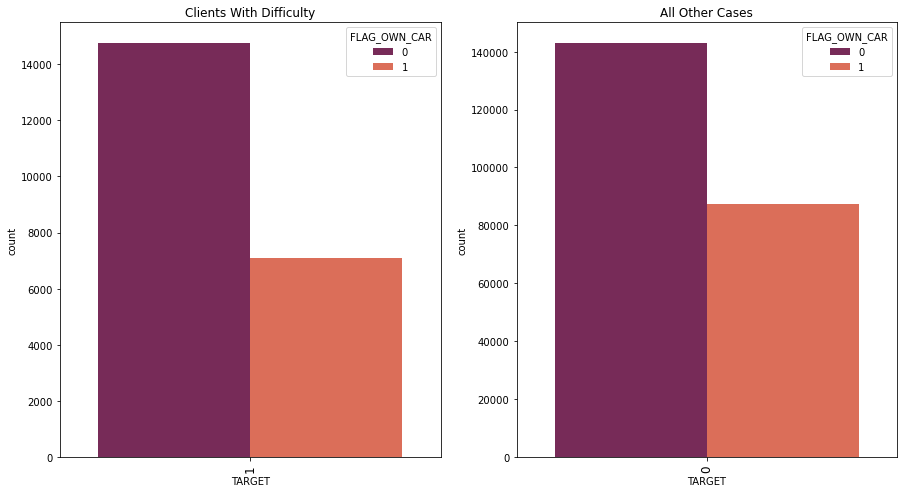

In [95]:
plots('TARGET','FLAG_OWN_CAR',clients_with_difficulty,all_other)

#### people not having a car avails most of the loan from the bank as compared to people who owns a car or cars.
#### people having a car is less likely to default the loans 
#### people not having a car is more likely to default making them risky customer for the bank.

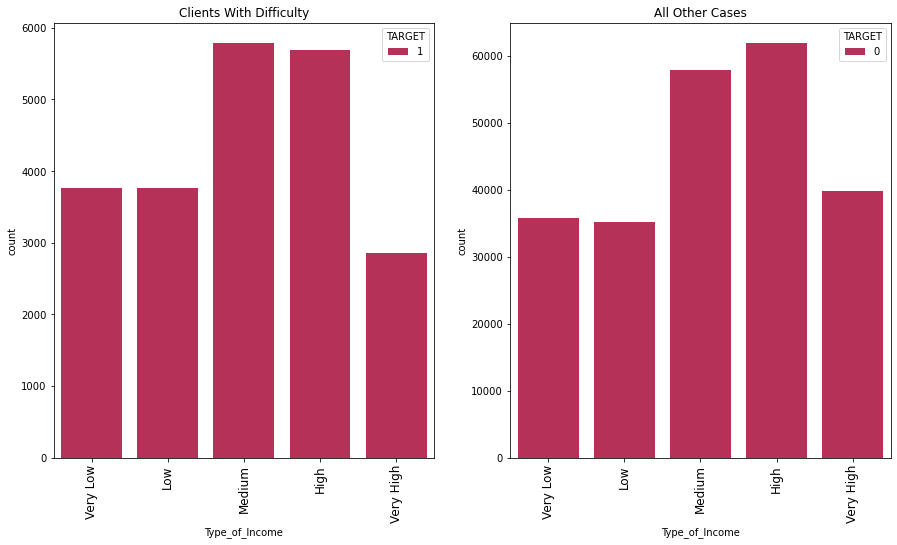

In [96]:
plots('Type_of_Income','TARGET',clients_with_difficulty,all_other)

#### Customers belonging to high income group and medium income group avails most loan out of all othe categories.
#### Very high income group is more likely to repay the loans to the bank
#### Very low and Low income group people are most likely to default their loans.

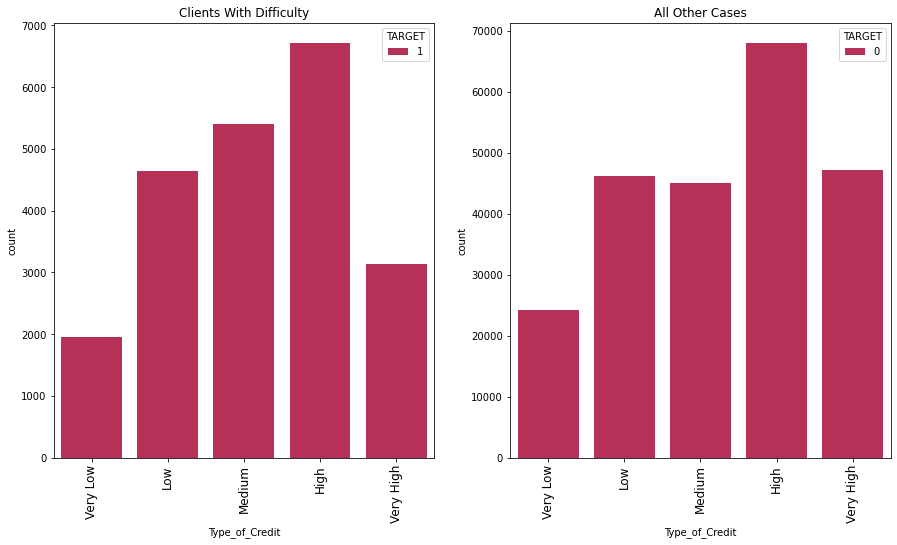

In [97]:
plots('Type_of_Credit','TARGET',clients_with_difficulty,all_other)

#### people aviling very high amount of credit is less likely to default and same is the cases form credit amount belonging in vey low category
#### The most risky group falls under medium category credit amount

In [98]:
new_application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             3458      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0   

#### Analysing ORGANIZATION_TYPE column.

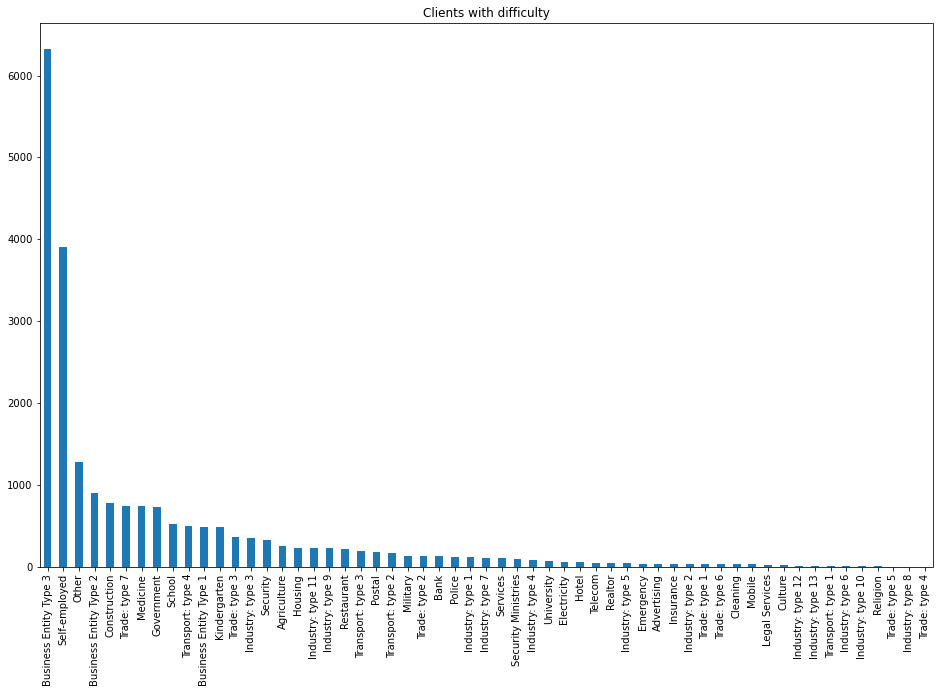

In [99]:
plt.figure(figsize=[16,10])
clients_with_difficulty['ORGANIZATION_TYPE'].value_counts().plot.bar()
plt.title("Clients with difficulty")
plt.show()

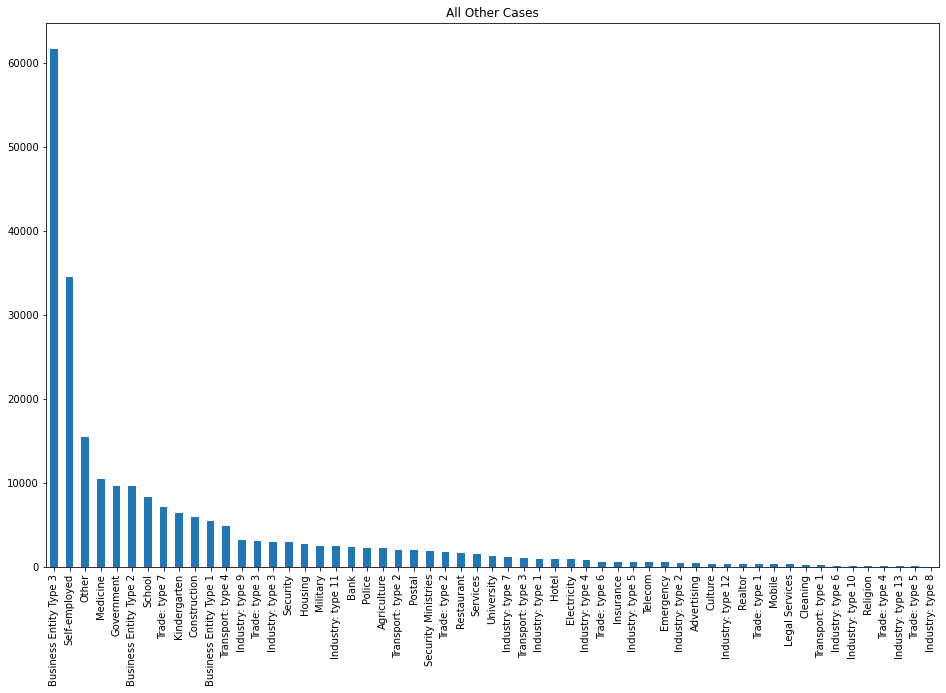

In [100]:
plt.figure(figsize=[16,10])
all_other['ORGANIZATION_TYPE'].value_counts().plot.bar()
plt.title("All Other Cases")
plt.show()

### Bussiness entity type 3 is most loan seeker from the banks which holds high ris o defaulting

#### Univariate continuous analysis

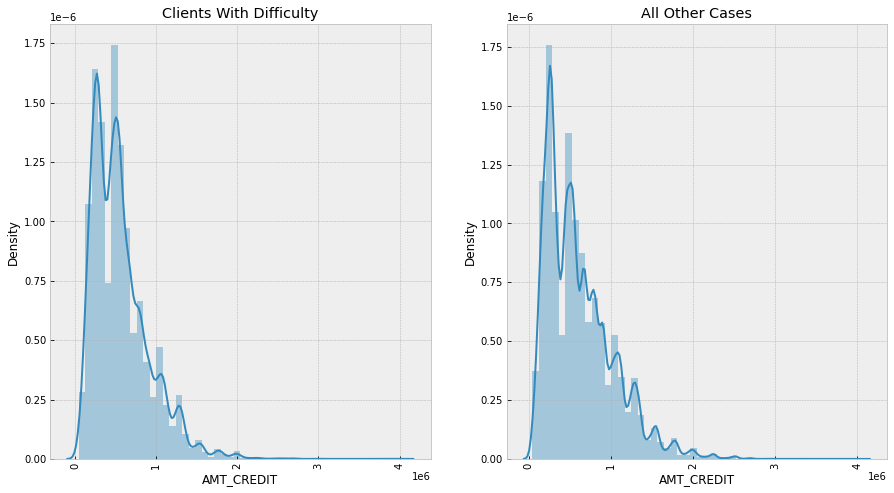

In [101]:
plt.figure(figsize=[15,8])
plt.style.use('bmh')
plt.subplot(1,2,1)
plt.title("Clients With Difficulty")
plt.xticks(rotation=90)
sns.distplot(clients_with_difficulty['AMT_CREDIT'])
plt.subplot(1,2,2)
plt.title("All Other Cases")
plt.xticks(rotation=90)
sns.distplot(all_other['AMT_CREDIT'])
plt.show()

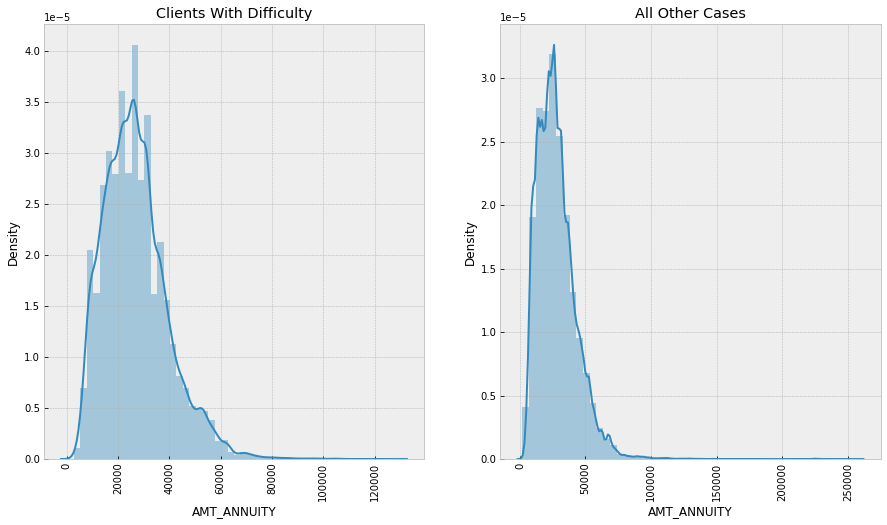

In [102]:
plt.figure(figsize=[15,8])
plt.style.use('bmh')
plt.subplot(1,2,1)
plt.title("Clients With Difficulty")
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
sns.distplot(clients_with_difficulty['AMT_ANNUITY'])
plt.yscale('linear')
plt.subplot(1,2,2)
plt.title("All Other Cases")
plt.xticks(rotation=90)
sns.distplot(all_other['AMT_ANNUITY'])
plt.yscale('linear')
plt.show()

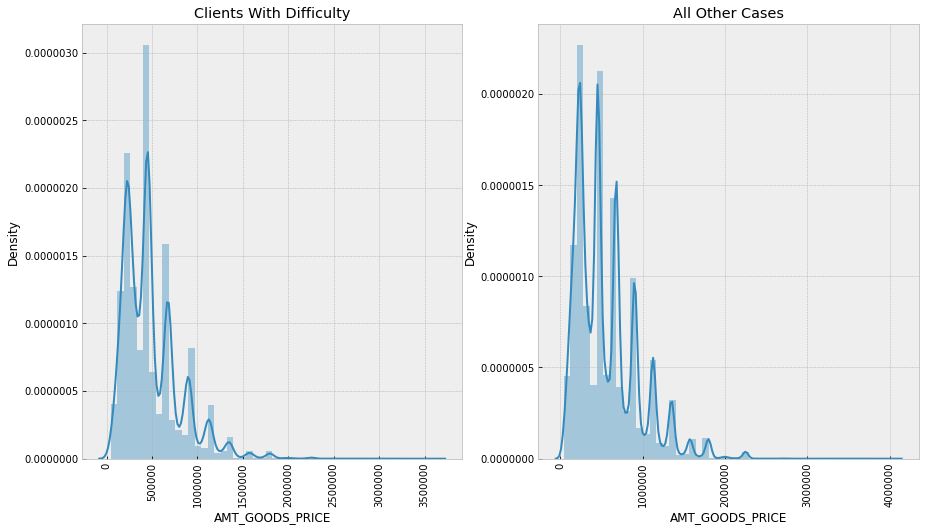

In [103]:
plt.figure(figsize=[15,8])
plt.style.use('bmh')
plt.subplot(1,2,1)
plt.title("Clients With Difficulty")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain')
sns.distplot(clients_with_difficulty['AMT_GOODS_PRICE'])
plt.subplot(1,2,2)
plt.title("All Other Cases")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain')
sns.distplot(all_other['AMT_GOODS_PRICE'])
plt.show()

In [104]:
###Here we can see goods price ranging between 0-500,000 is price where most of

## Bivariate Analysis


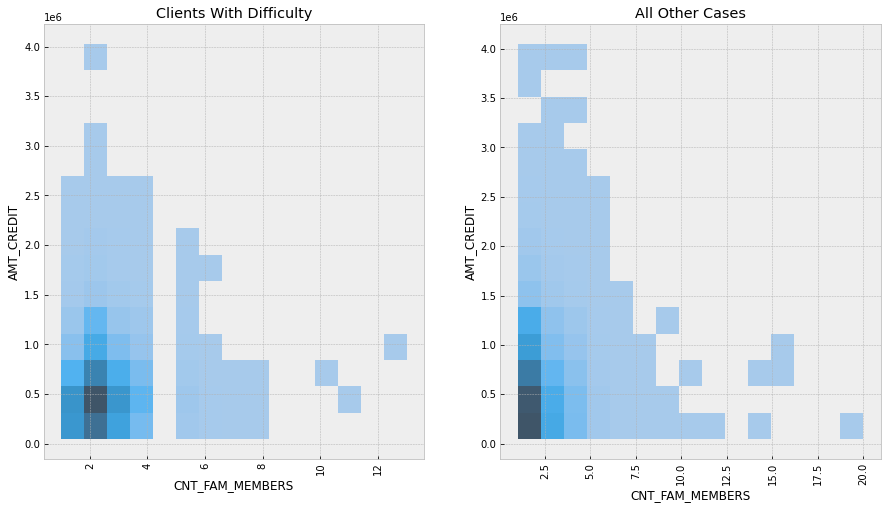

In [105]:
plt.figure(figsize=[15,8])
plt.style.use('bmh')
plt.subplot(1,2,1)
plt.title("Clients With Difficulty")
plt.xticks(rotation=90)
sns.histplot(x='CNT_FAM_MEMBERS',y='AMT_CREDIT',data=clients_with_difficulty,bins=15)
plt.subplot(1,2,2)
plt.title("All Other Cases")
plt.xticks(rotation=90)
sns.histplot(x='CNT_FAM_MEMBERS',y='AMT_CREDIT',data=all_other,bins=15)
plt.show()

#### family consisting of 2-4 members are going for higher credit amount from the bank in both the cases and are taking most loan comparitevly

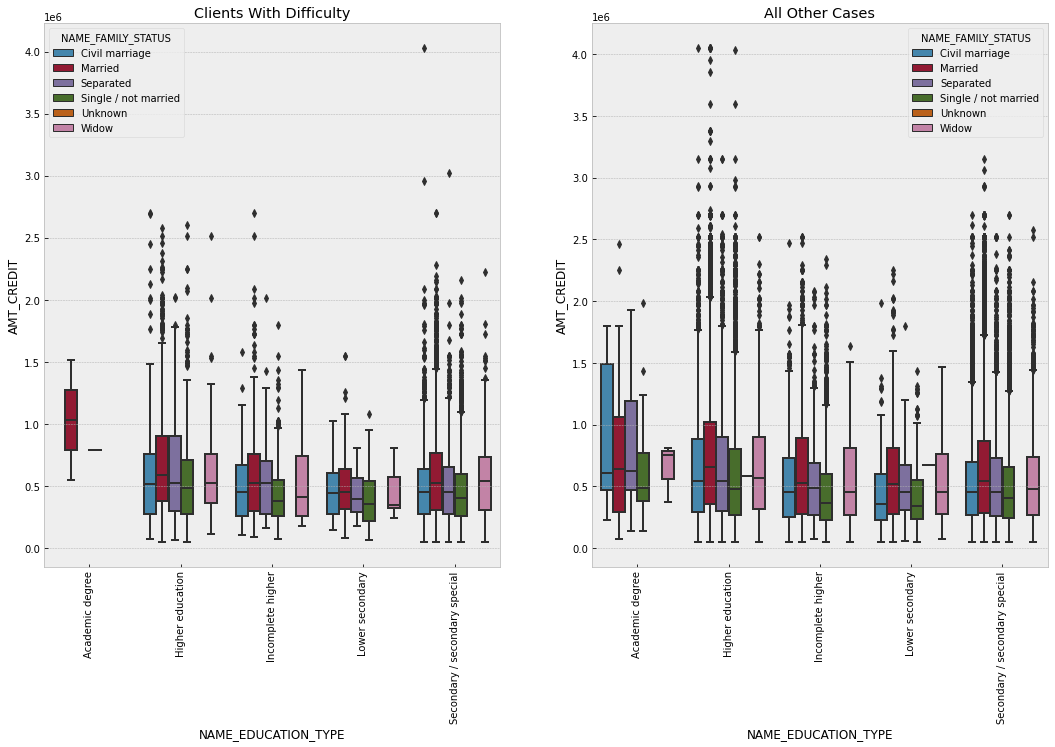

In [106]:
#credit amount v/s education
plt.figure(figsize=[18,10])
plt.style.use('bmh')
plt.subplot(1,2,1)
plt.title("Clients With Difficulty")
plt.xticks(rotation=90)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=clients_with_difficulty,hue='NAME_FAMILY_STATUS')
plt.subplot(1,2,2)
plt.title("All Other Cases")
plt.xticks(rotation=90)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=all_other,hue='NAME_FAMILY_STATUS')
plt.show()

#### People in Higher education and secondary education tends to high credit from the banks(as we can see outliers present in them in  both the cases)
#### client in secondary special taking very high credit is risky for the banks aswell.

### Education type and Income total analysis

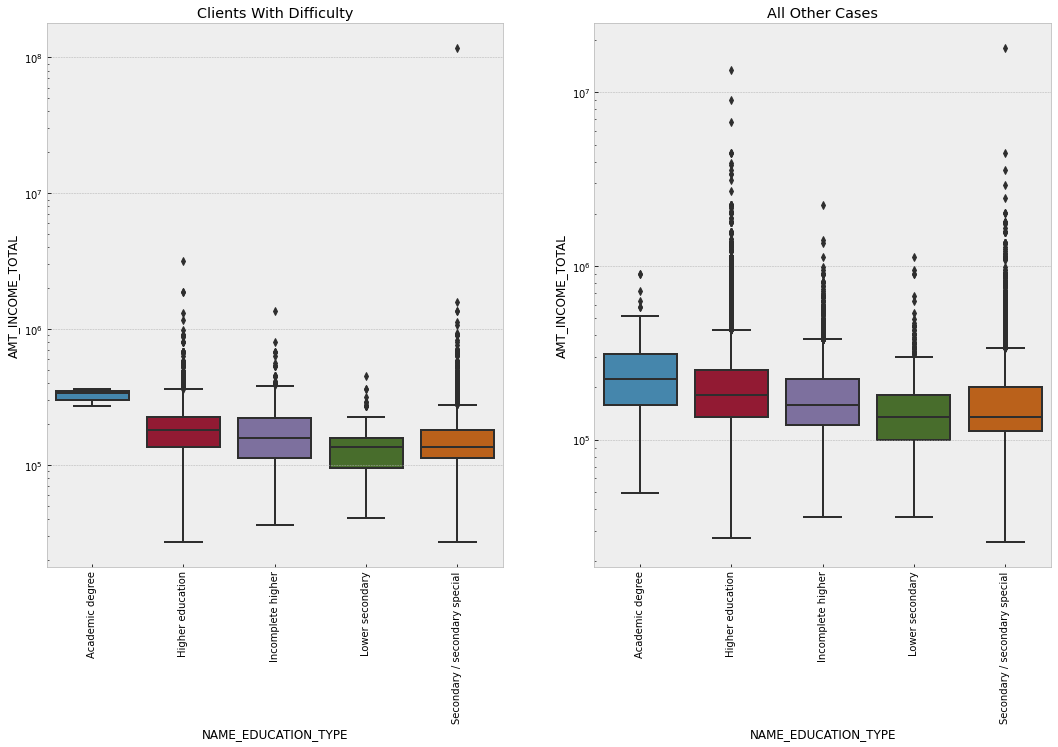

In [107]:
plt.figure(figsize=[18,10])
plt.style.use('bmh')
plt.subplot(1,2,1)
plt.title("Clients With Difficulty")
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=clients_with_difficulty)
plt.subplot(1,2,2)
plt.title("All Other Cases")
plt.yscale('log')
plt.xticks(rotation=90)
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data=all_other)
plt.show()

### clients in academic degree has the lowest amount of outliers but there income is higher than other eclients in different education types
### lower secondary education being the lowest of them all interms of income distribution for both the cases

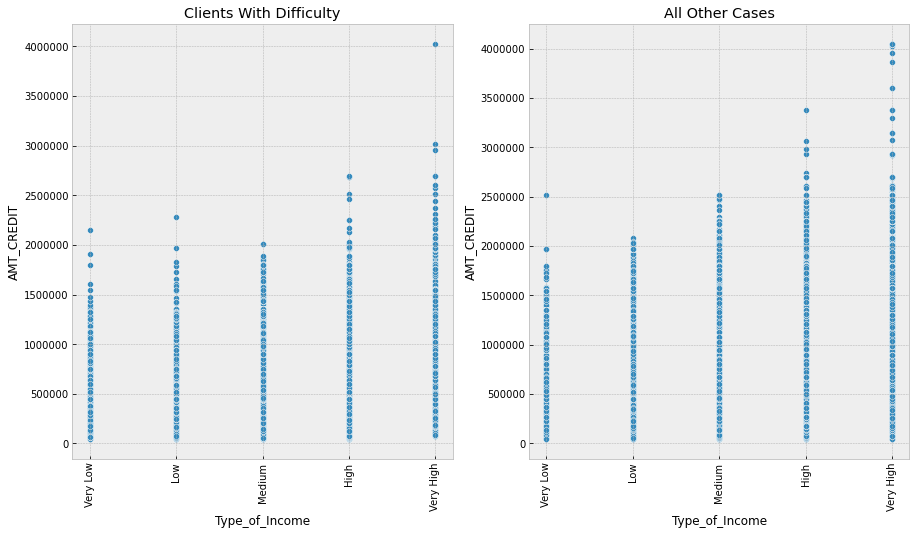

In [108]:
plt.figure(figsize=[15,8])
plt.style.use('bmh')
plt.subplot(1,2,1)
plt.title("Clients With Difficulty")
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
sns.scatterplot(x='Type_of_Income',y='AMT_CREDIT',data=clients_with_difficulty)
plt.subplot(1,2,2)
plt.title("All Other Cases")
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
sns.scatterplot(x='Type_of_Income',y='AMT_CREDIT',data=all_other)
plt.show()

In [109]:
##VERY HIGH INCOME GROUP PEOPLE ARE MOST RELIABLE CUSTOMER FOR THE BANK

### Now we will check for correlation between the columns for both the cases(i.e. defaulters and non-defaulters)

#### correlation for clients_with_difficulty datset

In [110]:
#we will take only few important columns so as to get better knowledge of it.

corr_cols1=clients_with_difficulty[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Age(in years)','EXT_SOURCE_2','DAYS_EMPLOYED','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_FAM_MEMBERS']].corr()


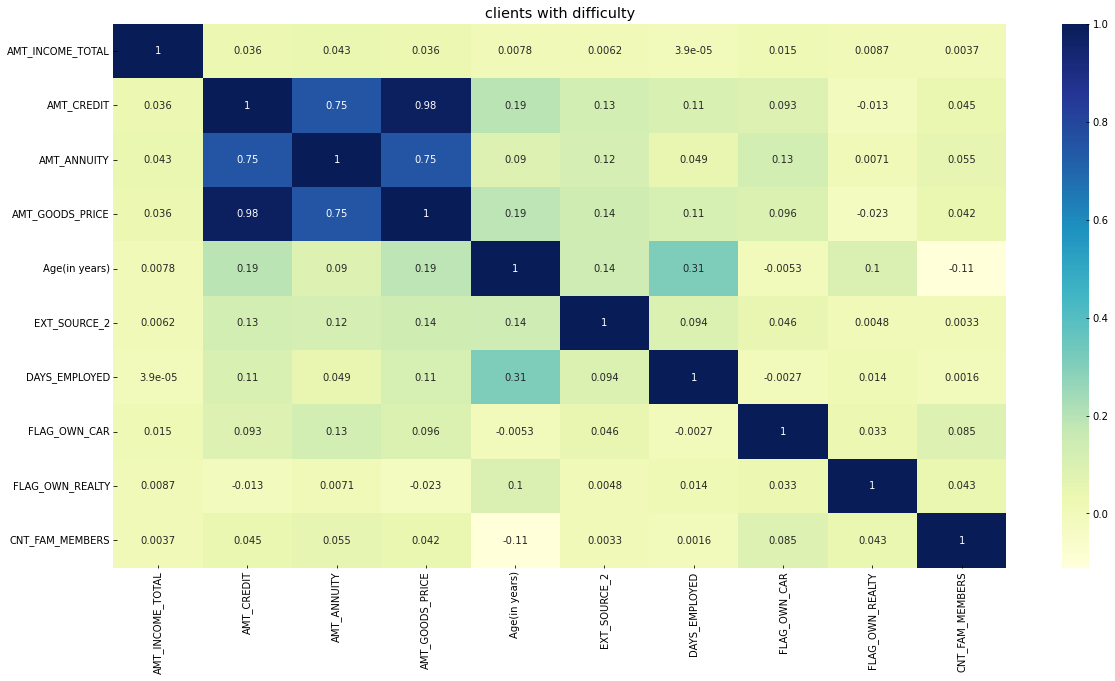

In [111]:
plt.figure(figsize=[20,10])
sns.heatmap(corr_cols1,cmap='YlGnBu',annot=True)
plt.title('clients with difficulty')
plt.show()

## correlation for all other cases i.e. non_defaulters

In [112]:
corr_cols0=all_other[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Age(in years)','EXT_SOURCE_2','DAYS_EMPLOYED','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_FAM_MEMBERS']].corr()

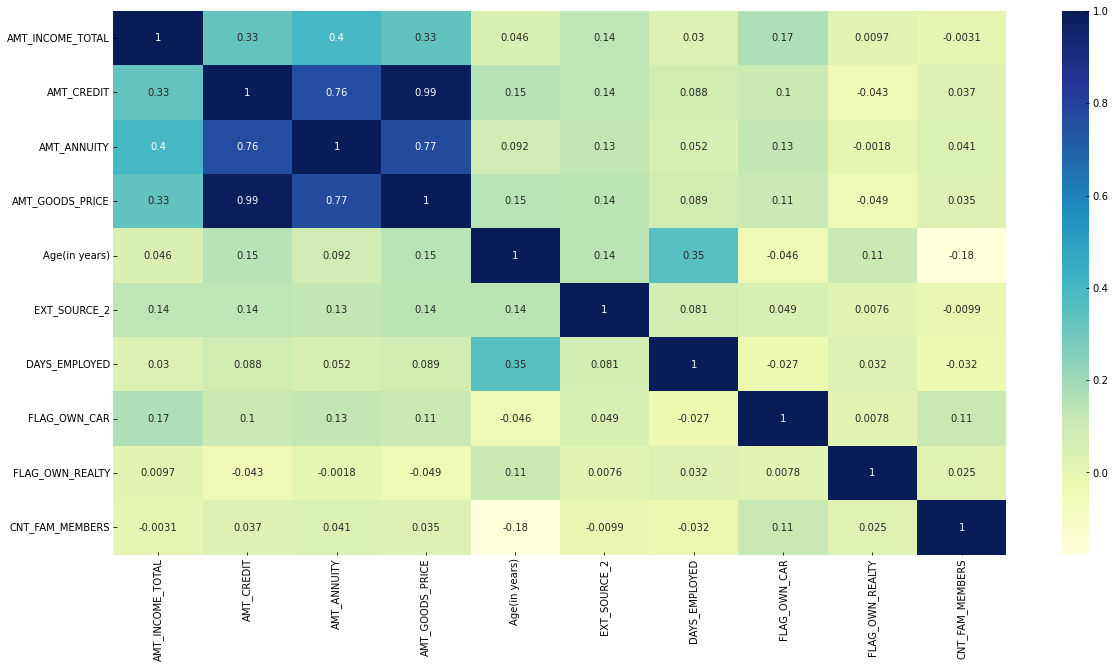

In [113]:
plt.figure(figsize=[20,10])
sns.heatmap(corr_cols0,cmap='YlGnBu',annot=True)
plt.show()

### Now checking prev application dataset

In [114]:
prev_application.shape

(1670214, 37)

In [115]:
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [116]:
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### checking for null values in previous application dataset

In [117]:
null_perc = (prev_application.isnull().sum()*100/len(prev_application)).sort_values(ascending=False)

### seeing such high null percentages we can drop all the columns having more than 40% of null values in the dataset

In [118]:
null_perc[null_perc>40]

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
dtype: float64

In [119]:
prev_application.drop(labels=list(null_perc[null_perc>40].index),axis=1,inplace=True)

In [120]:
## we can see that that all the values of more tan 40% are being removed from the previous application dataset

In [121]:
prev_application.shape

(1670214, 26)

In [122]:
(prev_application.isnull().sum()*100/len(prev_application)).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

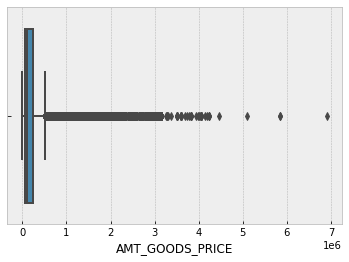

In [123]:
#checking for outlies in AMT_GOODS_PRICE column of prev_application dataset.
sns.boxplot(prev_application['AMT_GOODS_PRICE'])
plt.show()

In [124]:
#since ther is outliers so we can imute the null values with median
prev_application['AMT_GOODS_PRICE'].median()

112320.0

In [125]:
#same can be done for other continuos columns as well if ther is any outliers then im pute it using median 
#or else we can use mean of the column
#If the column is categorical type then we can use mode to replace the null values of that respective column
prev_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [126]:
### Droping XNA and XAP values from the required columns

In [127]:
#Droping XNA rows from the column
prev_application = prev_application[prev_application['NAME_CONTRACT_TYPE']!='XNA']

### Univariate analysis on prev_application dataset

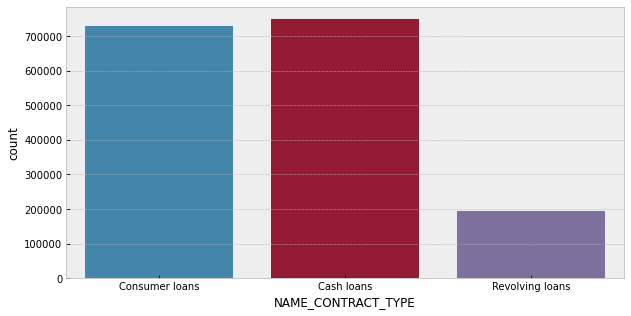

In [128]:
#categorical columns
plt.figure(figsize=[10,5])
sns.countplot(prev_application['NAME_CONTRACT_TYPE'])
plt.show()

In [129]:
#### from here we can see that cash loans are most prefered laon application followed by consumers loan
## Revolving loan being the least prefered

### now we can check how many loan here approved or refused 

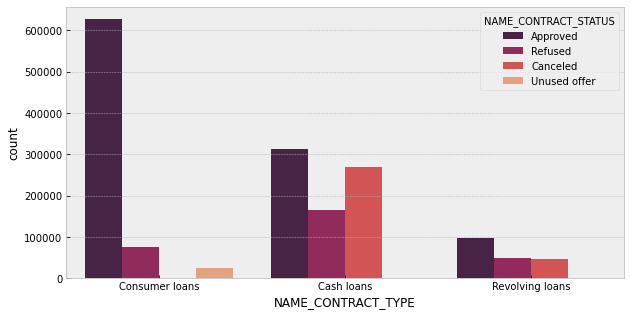

In [130]:
plt.figure(figsize=[10,5])
sns.countplot(prev_application['NAME_CONTRACT_TYPE'],hue=prev_application['NAME_CONTRACT_STATUS'],palette='rocket')
plt.show()

In [131]:
#most approved loan is consumer loan even whereas cash loan are rejected heavily as compared to others type of loans

#### Analysing NAME_PAYMENT_TYPE column

In [132]:
##Droping XNA values from NAME_PAYMENT_TYPE
prev_application = prev_application[prev_application['NAME_PAYMENT_TYPE']!="XNA"]

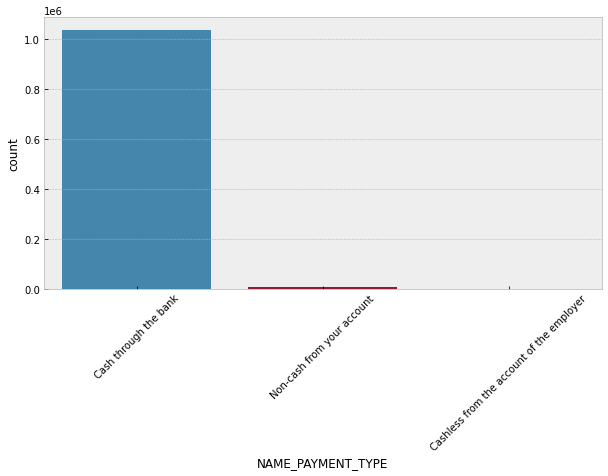

In [133]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
sns.countplot(prev_application['NAME_PAYMENT_TYPE'])
plt.show()

In [134]:
#from this we can see that cash through the bank method is most used method out of all other methods available
#non_cash from your account and cashless from the ccount of employers use is neglible for payment of loans

In [135]:
#DRoping XNA values from the NAME_PRODUCT_TYPE column
prev_application = prev_application[prev_application['NAME_PRODUCT_TYPE']!="XNA"]

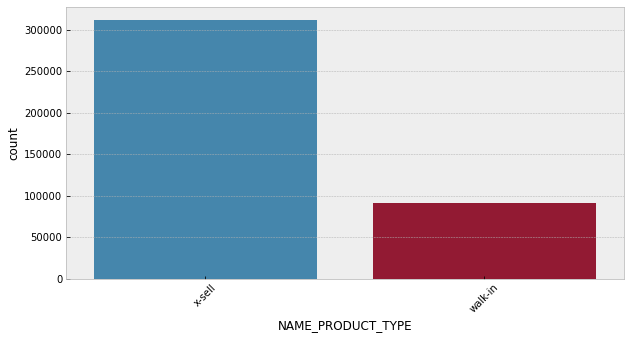

In [136]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
sns.countplot(prev_application['NAME_PRODUCT_TYPE'])
plt.show()

In [137]:
# here we can see taht walk-in are less as compared to  x-sell

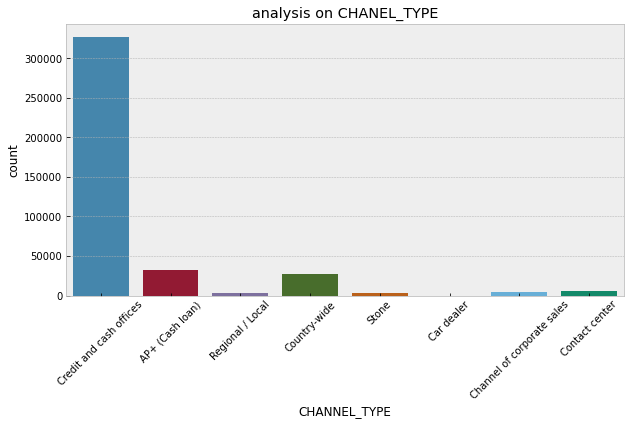

In [138]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
plt.title('analysis on CHANEL_TYPE')
sns.countplot(prev_application['CHANNEL_TYPE'])
plt.show()

In [139]:
### mos tof the prev application client where acquired from credit and cash offices followed by country-wide

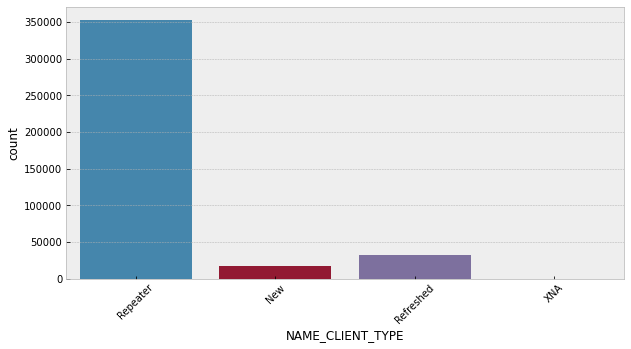

In [140]:
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
sns.countplot(prev_application['NAME_CLIENT_TYPE'])
plt.show()

In [141]:
#most of clients are reapeter and very few of them are new and refreshed compareritevly


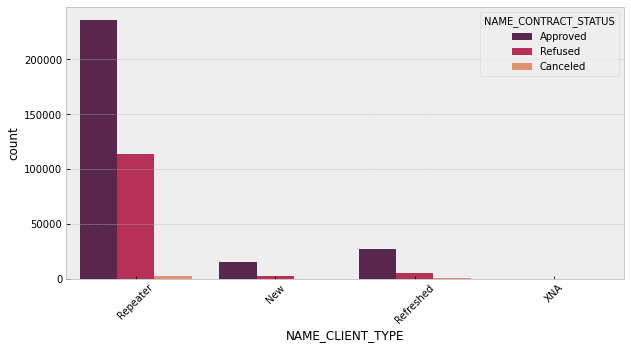

In [142]:
#now we will se whether they were aproved or rejected
plt.figure(figsize=[10,5])
plt.xticks(rotation=45)
sns.countplot(prev_application['NAME_CLIENT_TYPE'],hue=prev_application['NAME_CONTRACT_STATUS'],palette='rocket')
plt.show()

#### repeaters groups is the most refused group out of all other groups
#### but there approved percentage is also quite high

### Bivariate analysis 

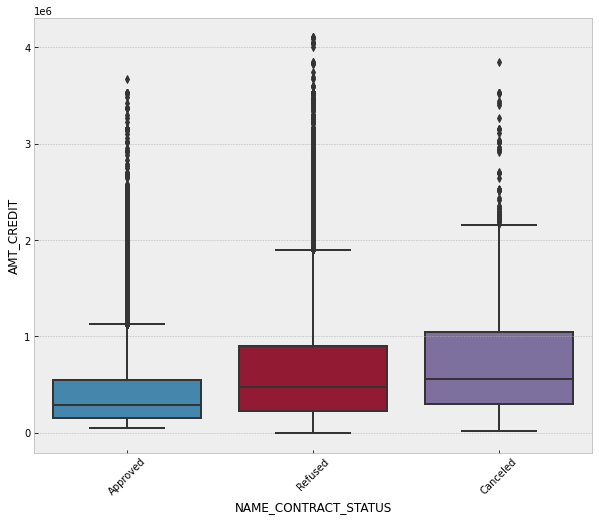

In [143]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=45)
sns.boxplot(x = prev_application['NAME_CONTRACT_STATUS'],y=prev_application['AMT_CREDIT'])
plt.show()

In [144]:
#if amt_creit is low then there is high chance of getting cancelled 

### Now we can merge both the dataset on a common column that is SK_ID_CURR

In [145]:
New_merge_data = new_application.merge(prev_application,how='left',on='SK_ID_CURR')

In [146]:
New_merge_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100004       0      Revolving loans           M             1   
3      100006       0           Cash loans           F             0   
4      100006       0           Cash loans           F             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                1             0          202500.0      406597.5   
1                0             0          270000.0     1293502.5   
2                1             0           67500.0      135000.0   
3                1             0          135000.0      312682.5   
4                1             0          135000.0      312682.5   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2         6750.0           135000.0   Unaccompanied          Working   
3        29686.5           297000.0   Unaccompanied          Working   
4        29686.5           297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.008019       19005           3039             9833.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0             2120        Laborers              1.0                     2   
1              291      Core staff              2.0                     1   
2             2531        Laborers              1.0                     2   
3             2437        Laborers              2.0                     2   
4             2437        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0                            2                    WEDNESDAY   
1                            1                       MONDAY   
2                            2                       MONDAY   
3                            2                    WEDNESDAY   
4                            2                    WEDNESDAY   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                         10                           0   
1                         11                           0   
2                          9                           0   
3                         17                           0   
4                         17                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0         

In [147]:
New_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399711 entries, 0 to 399710
Data columns (total 76 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    399711 non-null  int64   
 1   TARGET                        399711 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          399711 non-null  category
 3   CODE_GENDER                   399711 non-null  category
 4   FLAG_OWN_CAR                  399711 non-null  int32   
 5   FLAG_OWN_REALTY               399711 non-null  int32   
 6   CNT_CHILDREN                  399711 non-null  int64   
 7   AMT_INCOME_TOTAL              399711 non-null  float64 
 8   AMT_CREDIT_x                  399711 non-null  float64 
 9   AMT_ANNUITY_x                 399711 non-null  float64 
 10  AMT_GOODS_PRICE_x             399711 non-null  float64 
 11  NAME_TYPE_SUITE               398290 non-null  category
 12  NAME_INCOME_TYPE              

## Analysis on merged dataset

In [148]:
##but first we need to remove 'XNA' and 'XAP' values from NAME_CASH_LOAN_PURPOSE column
New_merge_data = New_merge_data[New_merge_data['NAME_CASH_LOAN_PURPOSE']!="XNA"]
New_merge_data = New_merge_data[New_merge_data['NAME_CASH_LOAN_PURPOSE']!="XAP"]

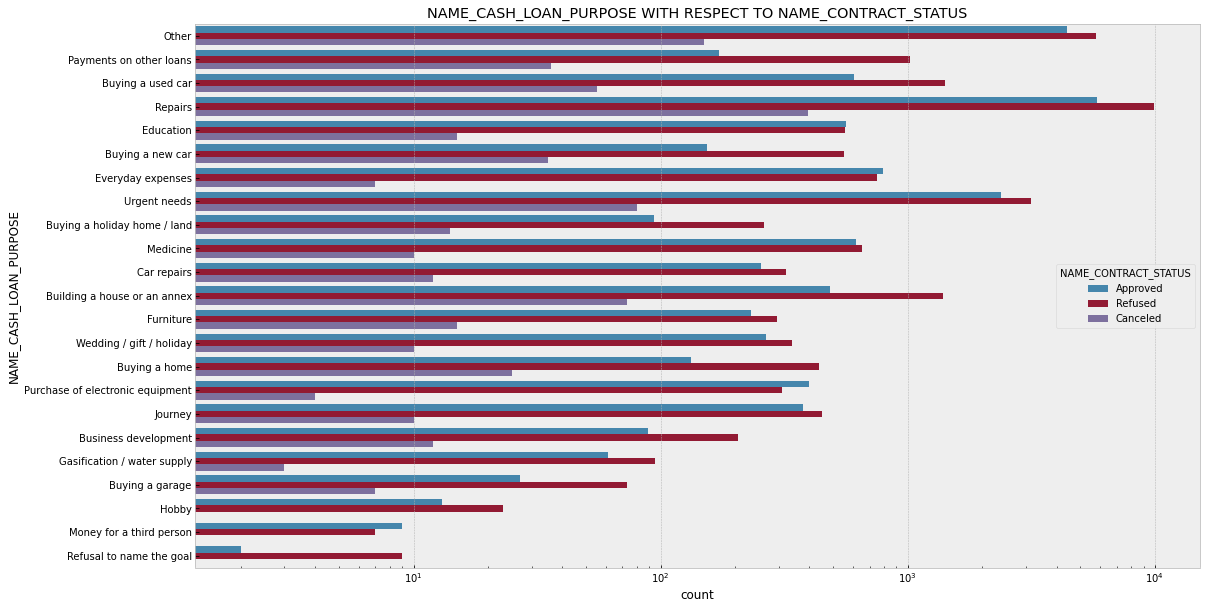

In [149]:
##As we know cash lon are most applied for so we can check the purpose for the cashloan and see 
#whether it has been approved or not.

plt.figure(figsize=[18,10])
plt.xscale('log')
plt.title('NAME_CASH_LOAN_PURPOSE WITH RESPECT TO NAME_CONTRACT_STATUS')
sns.countplot(data= New_merge_data,y='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.show()

In [150]:
### Here we can see that repairs is  where most of cash loan purpose rest but it also faces rejection the most followed by other group

### Bivariate analysis on merget dataset

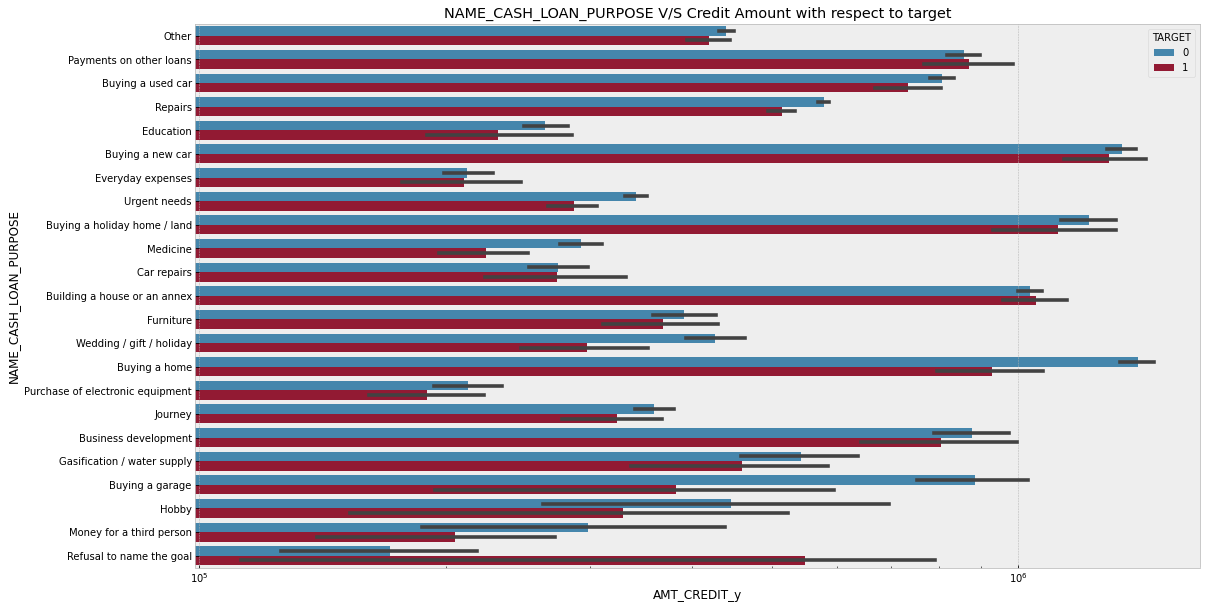

In [151]:
plt.figure(figsize=[18,10])
plt.xscale('log')
plt.title('NAME_CASH_LOAN_PURPOSE V/S Credit Amount with respect to target')
sns.barplot(data= New_merge_data,x='AMT_CREDIT_y',y='NAME_CASH_LOAN_PURPOSE',hue='TARGET')
plt.show()

#### cash loan purpose for buying a new car taking high credit has 40% chances to default
#### buying a home where credit amount is high in that case more customer usually pay off their loans

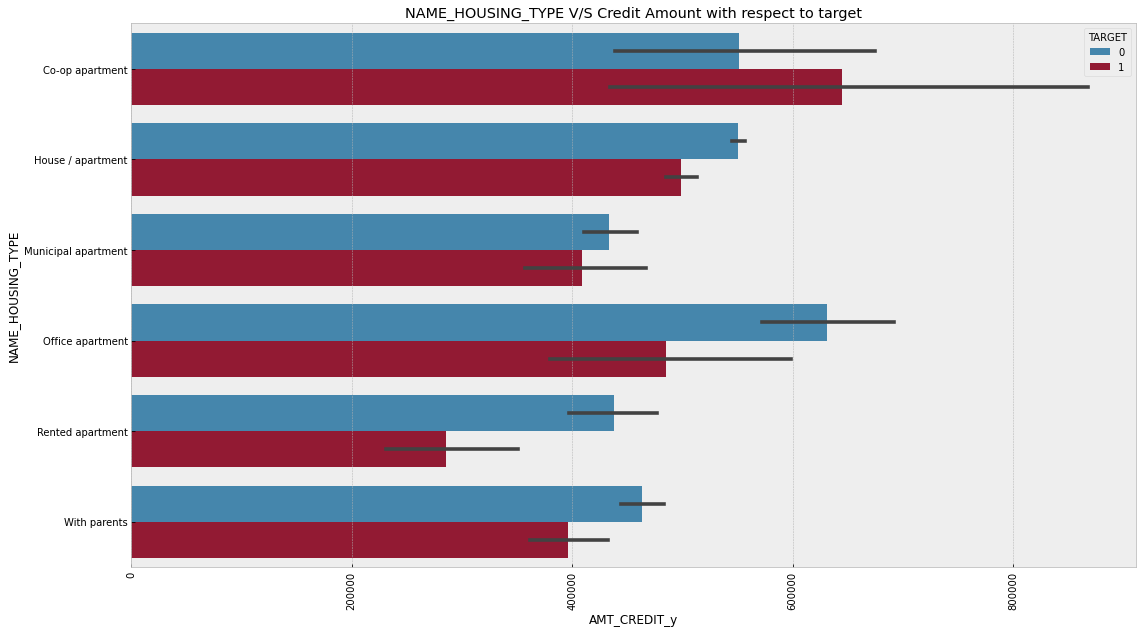

In [153]:
plt.figure(figsize=[18,10])
plt.title('NAME_HOUSING_TYPE V/S Credit Amount with respect to target')
plt.xticks(rotation=90)
sns.barplot(data= New_merge_data,x='AMT_CREDIT_y',y='NAME_HOUSING_TYPE',hue='TARGET')
plt.show()

#### BANK should avoid loans to co-op apartment as they have most difficulty in repayments.